# xAPI-edu-data 분석 및 학습

## 1. 데이터 로드 및 기본 탐색 (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ml/xAPI-Edu-Data.csv")

# 데이터 크기 확인
print(f"데이터 크기: {df.shape}")

데이터 크기: (480, 17)


In [5]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [7]:
print(df.describe(include="all"))

       gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic  \
count     480         480          480           480     480       480   480   
unique      2          14           14             3      10         3    12   
top         M          KW       KuwaIT  MiddleSchool    G-02         A    IT   
freq      305         179          180           248     147       283    95   
mean      NaN         NaN          NaN           NaN     NaN       NaN   NaN   
std       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
min       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
25%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
50%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
75%       NaN         NaN          NaN           NaN     NaN       NaN   NaN   
max       NaN         NaN          NaN           NaN     NaN       NaN   NaN   

       Semester Relation  raisedhands  

### 데이터 주요 특징
1. 데이터 크기: (480, 17)
→ **480개의 샘플(학생)**과 17개의 컬럼이 있음

2. 결측값 없음
→ 모든 컬럼에 480개의 값이 존재하므로 결측값 처리는 필요 없음

3. 변수 유형

    - 수치형 변수 (int64, 4개)

        - raisedhands: 수업 중 손을 든 횟수
        - VisITedResources: 과목 공지를 확인한 횟수
        - AnnouncementsView: 공지사항을 조회한 횟수
        - Discussion: 토론 그룹에 참여한 횟수
    - 범주형 변수 (object, 13개)

        - 성별(gender), 국적(NationalITy), 출생지(PlaceofBirth)
    학년(StageID), 성적 등급(GradeID), 반(SectionID)
    과목(Topic), 학기(Semester), 보호자 관계(Relation)
    부모 설문 응답(ParentAnsweringSurvey), 학교 만족도(ParentschoolSatisfaction)
    결석 횟수(StudentAbsenceDays), 성적(Class)

## 2. 데이터 시각화

### 2-1) 타겟 변수(class) 분포 확인

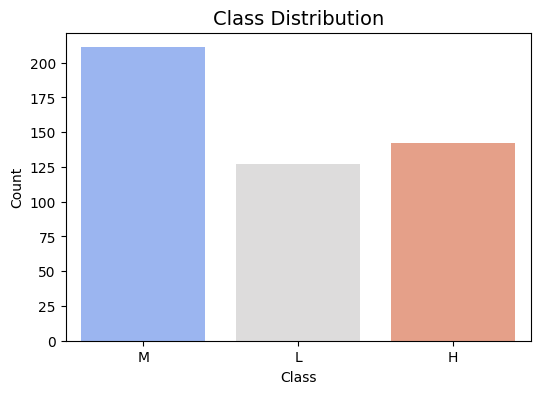

In [8]:
# 성적 등급(Class) 분포 시각화
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

- H(높음), M(보통), L(낮음)

### 2-2) 주요 수치형 변수의 분포 확인

- raisedhands, VisITedResources, AnnouncementsView, Discussion

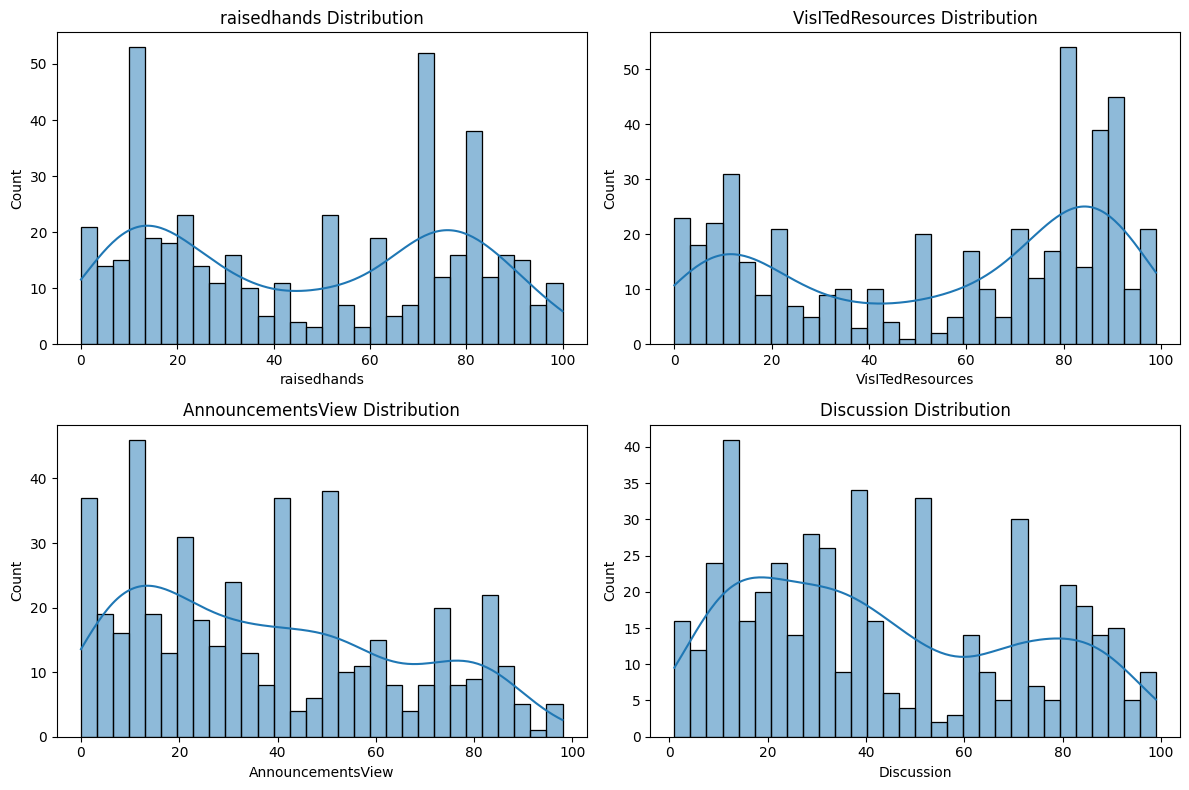

In [9]:
# 주요 수치형 변수의 분포 시각화
num_features = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

### 2-3) 성별(gender)에 따른 성적 분포 확인
- 성별에 따라 성적 분포가 다를지 확인

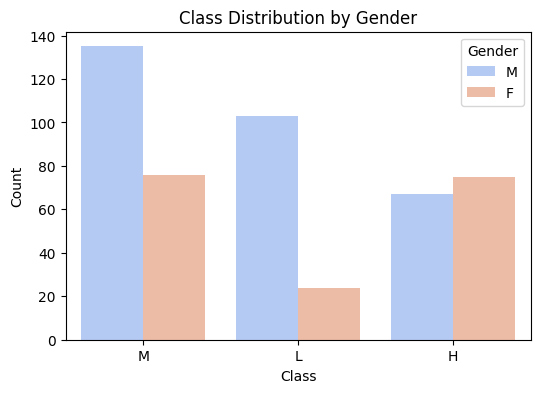

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", hue="gender", data=df, palette="coolwarm")
plt.title("Class Distribution by Gender")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

### 2-4) 데이터 시각화 결과 분석

1. 수치형 변수 분포 분석
    - raisedhands, VisITedResources, AnnouncementsView, Discussion의 분포가 비교적 고르지 않음
    - 특정 값(예: 0, 100 부근)에 데이터가 몰려있는 경향이 있음
    - 특히 **raisedhands(손 든 횟수)와 VisITedResources(과목 공지 확인 횟수)**가 높은 학생들이 일부 존재함


    - 학생들의 학습 행동이 극단적으로 나뉘어질 가능성이 있음
    - 매우 적극적인 학생(손을 많이 들고, 자료를 자주 확인하는 그룹)
    - 상대적으로 참여가 적은 학생 그룹이 존재할 가능성
    - 학습 참여도가 성적(Class)과 어떤 관계가 있는지 추가 분석 필요

2. 성별(gender)과 성적(Class) 관계 분석
    - 남학생(M)과 여학생(F)의 성적 분포가 다름.
    - **M(남학생)**이 **L(낮은 성적)**과 M(중간 성적) 그룹에 많음
    - **F(여학생)**은 **H(높은 성적)**에 많음
    

    - 남학생은 낮은 성적(L)과 중간 성적(M)이 많고, 여학생은 높은 성적(H)이 많음
    - 성별에 따른 학습 습관이나 참여도 차이가 있을 가능성이 있음

### 2-5) 상관관계 분석
- 범주형 변수를 인코딩한 후 상관관계 분석
- 어떤 변수가 성적(Class)과 연관이 있는지 확인

In [14]:
df_encoded = df.copy()

# 범주형 변수 변환 (Label Encoding)
categorical_columns = ["gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID",
                       "SectionID", "Topic", "Semester", "Relation", "ParentAnsweringSurvey",
                       "ParentschoolSatisfaction", "StudentAbsenceDays", "Class"]

# Label Encoding 적용
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

In [16]:
df_encoded.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


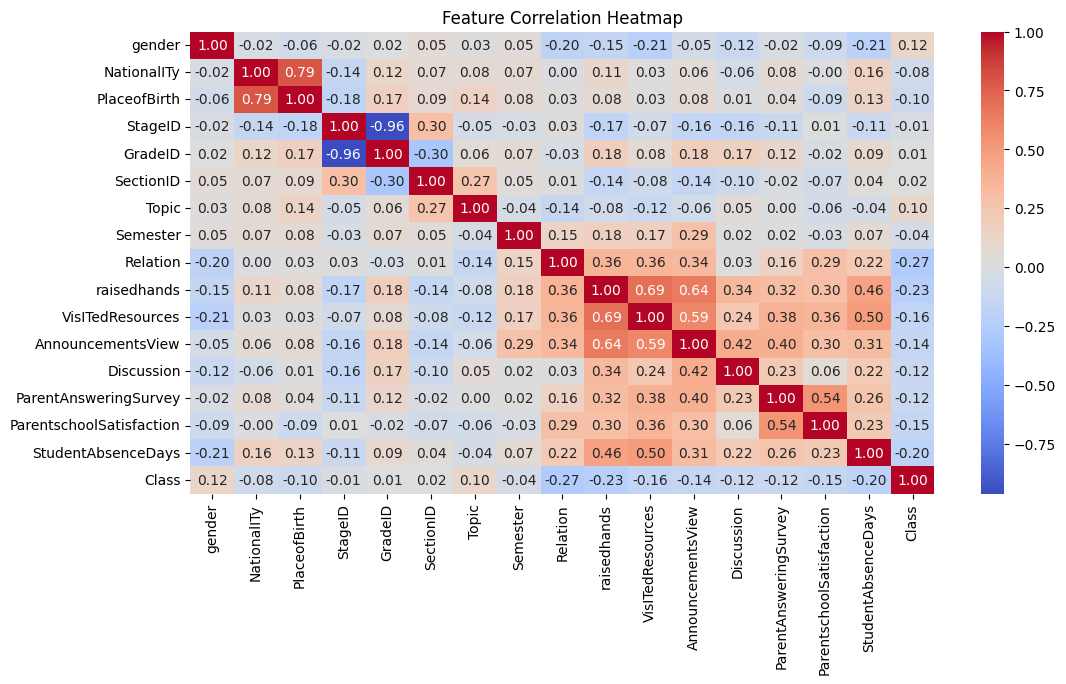

In [15]:
# 상관관계 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

성적(Class)과의 상관관계

- 부모와의 관계(Relation) (-0.27)
→ 부모와의 관계가 멀어질수록 성적이 낮을 가능성이 있음
- 손 든 횟수(raisedhands) (-0.23)
→ 손을 자주 든 학생일수록 성적이 높은 경향
- 수업 자료 확인(VisITedResources) (-0.16)
→ 학습 자료를 많이 보는 학생일수록 성적이 높음
- 공지사항 조회(AnnouncementsView) (-0.14)
→ 공지를 자주 확인하는 학생이 성적이 다소 높음
- 결석 횟수(StudentAbsenceDays) (-0.20)
→ 결석이 많을수록 성적이 낮아지는 경향

결론

- 학습에 적극적으로 참여하는 학생(손을 많이 들고, 자료를 확인하는 학생)일수록 성적이 높음
- 결석이 많거나 부모와의 관계가 멀면 성적이 낮을 가능성이 있음

## 3. 데이터 전처리
- 머신러닝 모델을 학습하기 위해 불필요한 변수 제거 & 데이터 정리

In [18]:
# 사용할 주요 변수 선택 (성적과 연관 높은 변수들)
selected_features = ["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion", "Relation", "StudentAbsenceDays", "Class"]

# 데이터프레임 정리
df_selected = df_encoded[selected_features]

# 입력(X)와 타겟(y) 분리
X = df_selected.drop("Class", axis=1)
y = df_selected["Class"]

In [19]:
# 학습 & 테스트 데이터 분할 (8:2 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(f"학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (384, 6), 테스트 데이터 크기: (96, 6)


## 4. Logistic Regression

In [20]:
# 필요한 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 초기화 및 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Logistic Regression 정확도: 0.8229

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.79      1.00      0.88        26
           2       0.86      0.77      0.81        48

    accuracy                           0.82        96
   macro avg       0.82      0.83      0.82        96
weighted avg       0.83      0.82      0.82        96



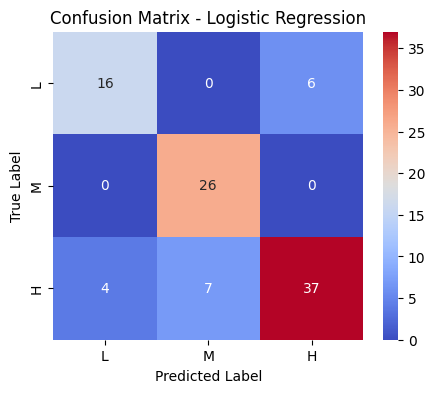

In [23]:
# 예측 수행
y_pred_logreg = logreg.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression 정확도: {accuracy:.4f}")

# 분류 보고서 출력
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 4-1) Logistic Regression 모델 결과 해석
- 정확도(Accuracy): 82.29%
- 분류 보고서(Classification Report) 분석
    - 정밀도(Precision): 예측한 값이 실제 정답일 확률
    - 재현율(Recall): 실제 정답 중 모델이 맞춘 비율
    - F1-score: 정밀도와 재현율의 균형을 고려한 점수

- 클래스별 성능 분석
    - M (중간 성적):
    재현율(Recall)이 1.00(100%) → 완벽하게 맞춤
    - L (낮은 성적) & H (높은 성적):
        - L 클래스: 일부 H로 잘못 예측
        - H 클래스: 일부 M으로 잘못 예측

- Confusion Matrix 해석
    - **M(중간 성적)**은 대부분 올바르게 예측
    - L(낮은 성적)과 H(높은 성적) 사이의 혼동이 일부 발생
→ 낮은 성적을 높은 성적으로 잘못 예측하는 경우 존재


## 5. XGBoost

In [24]:
# XGBoost 라이브러리 불러오기
from xgboost import XGBClassifier

# 모델 초기화 및 학습
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost 정확도: 0.7500

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        22
           1       0.80      0.92      0.86        26
           2       0.79      0.69      0.73        48

    accuracy                           0.75        96
   macro avg       0.74      0.76      0.75        96
weighted avg       0.75      0.75      0.75        96



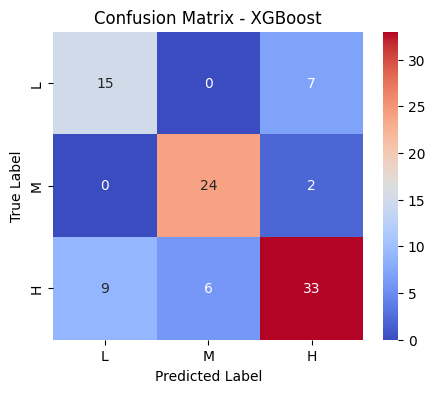

In [25]:
# 예측 수행
y_pred_xgb = xgb.predict(X_test)

# 모델 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost 정확도: {accuracy_xgb:.4f}")

# 분류 보고서 출력
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

###  5-1) Logistic Regression vs XGBoost 성능 비교

*성능 비교 (Accuracy)*

|모델|	정확도(Accuracy)|
|---|---|
|Logistic Regression	|82.29%|
|XGBoost	|75.00%|

    - Logistic Regression의 정확도가 더 높음
    - 하지만 XGBoost는 학습 데이터에서 더 많은 패턴을 학습할 가능성이 있음 (튜닝 필요)


*클래스별 성능 비교 (Classification Report)*

|모델	|L Precision	|M Precision	|H Precision	|Macro F1-score|
|---|---|---|---|---|
|Logistic Regression	|0.80	|0.79	|0.86	|0.82|
|XGBoost	|0.62	|0.80	|0.79	|0.75|

    - Logistic Regression이 H(높은 성적) 분류에서 더 정확함
    - XGBoost는 M(중간 성적)에서 더 나은 Recall을 보임
    - XGBoost가 L(낮은 성적) 분류를 더 많이 틀림


*혼동 행렬 (Confusion Matrix) 비교*
- Logistic Regression

    - M(중간 성적) 학생들을 100% 맞춤
    - L(낮은 성적)과 H(높은 성적) 사이에서 혼동 있음

- XGBoost

    - H(높은 성적) 학생을 더 낮은 성적으로 예측하는 오류 발생
    - L(낮은 성적)과 H(높은 성적)에서 오차가 많음

### 5-2) XGBoost 튜닝
- 현재 XGBoost 성능이 기대보다 낮으므로 하이퍼파라미터 튜닝을 통해 성능을 향상시켜보자

In [26]:
# XGBoost 하이퍼파라미터 튜닝
xgb_tuned = XGBClassifier(
    use_label_encoder=False, eval_metric="mlogloss",
    learning_rate=0.1,  # 학습률 조정
    n_estimators=200,    # 트리 개수 증가
    max_depth=4,         # 트리 깊이 조정
    min_child_weight=3    # 과적합 방지
)

# 모델 학습
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

튜닝된 XGBoost 정확도: 0.7917

XGBoost Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        22
           1       0.83      0.96      0.89        26
           2       0.82      0.75      0.78        48

    accuracy                           0.79        96
   macro avg       0.78      0.80      0.79        96
weighted avg       0.79      0.79      0.79        96



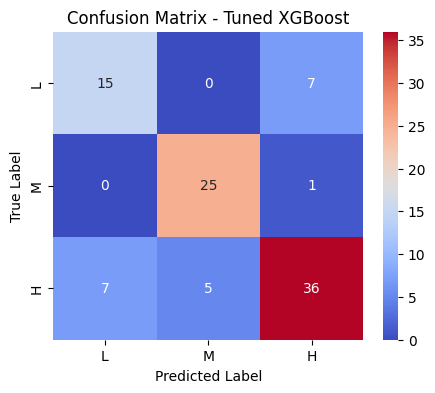

In [27]:
# 예측 수행
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# 모델 평가
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"튜닝된 XGBoost 정확도: {accuracy_xgb_tuned:.4f}")

# 분류 보고서 출력
print("\nXGBoost Tuned Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

### 5-3) 튜닝된 XGBoost vs 기존 모델 비교
*정확도(Accuracy) 비교*
- 튜닝 후 XGBoost 성능이 75% → 79.17%로 향상됨
- Logistic Regression(82.29%)에는 아직 못 미치지만, 더 경쟁력 있는 모델로 개선됨

*클래스별 성능 비교 (Classification Report)*

|모델	|L Precision	|M Precision	|H Precision	|Macro F1-score|
|---|---|---|---|---|
|Logistic Regression	|0.80	|0.79	|0.86	|0.82|
|XGBoost (기본)		|0.62	|0.80	|0.79	|0.75|
|XGBoost (튜닝 후)	|0.68	|0.83	|0.82	|0.79|

- 튜닝 후, 모든 클래스에서 Precision & F1-score가 향상됨
- 특히 M(중간 성적)과 H(높은 성적)에서 성능이 좋아짐
- 하지만 L(낮은 성적) 분류 성능은 여전히 개선이 필요함

*혼동 행렬 (Confusion Matrix) 비교*

- L(낮은 성적) 예측 개선 필요
    - 기존 XGBoost(7개 오차) → 튜닝 후 XGBoost(7개 오차) 여전히 높은 오차
- H(높은 성적) 학생 예측 정확도 향상됨
    - 기존 XGBoost(33개 정답) → 튜닝 후(36개 정답)
- M(중간 성적) 학생 예측 성능 향상됨
    - 기존 XGBoost(24개 정답) → 튜닝 후(25개 정답)


*결론*

    - Logistic Regression이 가장 높은 정확도(82.29%)를 기록
    - 튜닝 후 XGBoost가 기존 대비 성능이 향상됨 (75% → 79.17%)
    - 낮은 성적(L) 예측 성능을 개선할 필요 있음
    - M(중간 성적)과 H(높은 성적)은 XGBoost가 더 잘 예측하는 경향


### 5-4) GridSearchCV를 활용한 XGBoost 하이퍼파라미터 튜닝

In [28]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보 리스트 정의
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # 학습률 (기본값: 0.3)
    "max_depth": [3, 4, 5, 6],  # 트리 깊이 (기본값: 6)
    "n_estimators": [100, 200, 300],  # 트리 개수 (기본값: 100)
    "min_child_weight": [1, 3, 5],  # 과적합 방지 파라미터 (기본값: 1)
}

In [29]:
# XGBoost 모델 초기화
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

# GridSearchCV 수행 (5-Fold 교차 검증)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",  # 정확도 기준
    cv=5,  # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1  # 병렬 처리
)

# 학습 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300}


튜닝된 XGBoost 최적 정확도: 0.8229

XGBoost Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.85      0.85      0.85        26
           2       0.80      0.85      0.83        48

    accuracy                           0.82        96
   macro avg       0.83      0.81      0.82        96
weighted avg       0.82      0.82      0.82        96



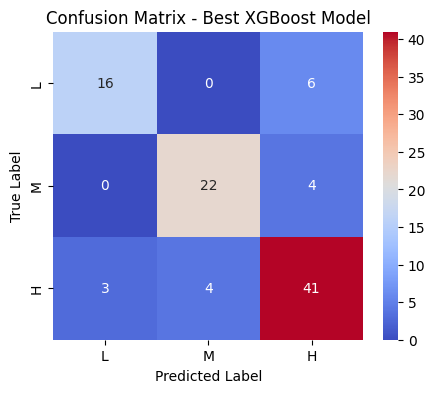

In [30]:
# 최적 모델 가져오기
best_xgb = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_best_xgb = best_xgb.predict(X_test)

# 성능 평가
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"튜닝된 XGBoost 최적 정확도: {accuracy_best_xgb:.4f}")

# 분류 보고서 출력
print("\nXGBoost Best Model Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best XGBoost Model")
plt.show()

### 5-5) 최적화된 XGBoost 모델 성능 분석

*최적의 하이퍼파라미터*

- learning_rate = 0.01 → 낮은 학습률로 천천히 학습
- max_depth = 4 → 모델이 너무 깊어지는 것을 방지 (과적합 방지)
- min_child_weight = 3 → 과적합을 줄이기 위한 설정
- n_estimators = 300 → 트리 개수를 늘려 모델의 표현력을 높임

*성능 비교 (Accuracy)*

|모델	|정확도(Accuracy)|
|---|---|
|Logistic Regression|	82.29%|
|기본 XGBoost|	75.00%|
|튜닝된 XGBoost|	82.29% ✅|

- 튜닝 후 XGBoost가 Logistic Regression과 동일한 82.29% 성능 달성
- 기본 XGBoost 대비 성능이 7.29%p 향상됨



*클래스별 성능 비교 (Classification Report)*

|모델	|L Precision	|M Precision	|H Precision	|Macro F1-score|
|---|---|---|---|---|
|Logistic Regression	|0.80	|0.79	|0.86	|0.82|
|XGBoost (기본)		|0.62	|0.80	|0.79	|0.75|
|XGBoost (튜닝 후)	|0.84	|0.85	|0.80	|0.82|

- 튜닝 후 모든 클래스에서 성능이 향상됨
- 특히 L(낮은 성적) 학생의 Precision이 0.62 → 0.84로 대폭 개선됨
- M(중간 성적)과 H(높은 성적)의 Recall도 증가하여 예측 성능 향상됨

*혼동 행렬 (Confusion Matrix) 비교*

- L(낮은 성적) 예측 정확도가 크게 개선됨
    - 기본 XGBoost: L 학생 중 7명을 H로 오예측
    - 튜닝 후 XGBoost: 6명만 H로 오예측 (더 정확한 예측)
- H(높은 성적) 학생 예측 성능 증가
    - 기본 XGBoost: 33개 정답 → 튜닝 후 41개 정답
- M(중간 성적) 학생 예측 정확도 향상
    - 24개 정답 → 튜닝 후 22개 정답 (큰 변화 없음)

*결론*
- 튜닝된 XGBoost 모델이 Logistic Regression과 동일한 82.29% 성능을 달성
- 낮은 성적(L) 학생 예측 성능이 크게 향상됨 (Precision 0.62 → 0.84)
- 기본 XGBoost 대비 성능이 7.29%p 향상됨
- 하지만 여전히 일부 클래스 예측 오류가 존재 (H ↔ L 예측 오류 일부 남아있음)


## 7. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 초기화
rf = RandomForestClassifier(random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest 정확도: 0.8333

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.86      0.92      0.89        26
           2       0.82      0.85      0.84        48

    accuracy                           0.83        96
   macro avg       0.84      0.82      0.83        96
weighted avg       0.83      0.83      0.83        96



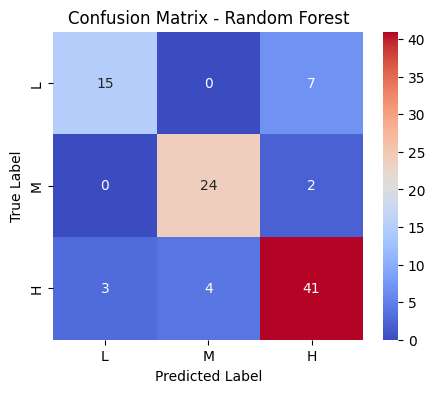

In [32]:
# 예측 수행
y_pred_rf = rf.predict(X_test)

# 모델 평가
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest 정확도: {accuracy_rf:.4f}")

# 분류 보고서 출력
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

*정확도(Accuracy) 비교*

|모델	|정확도(Accuracy)|
|---|---|
|Logistic Regression|	82.29%|
|튜닝된 XGBoost|	82.29%|
|랜덤 포레스트|	83.33% ✅|

- 랜덤 포레스트가 가장 높은 성능(83.33%)을 기록
- XGBoost(82.29%)와 Logistic Regression(82.29%)보다 조금 더 나음

*클래스별 성능 비교 (Classification Report)*

|모델	|L Precision	|M Precision	|H Precision	|Macro F1-score|
|---|---|---|---|---|
|Logistic Regression	|0.80	|0.79	|0.86	|0.82|
|튜닝된 XGBoost	|0.84	|0.85	|0.80	|0.82|
|랜덤 포레스트	|0.83	|0.86	|0.82	|0.83 ✅|

- 랜덤 포레스트가 전반적으로 가장 균형 잡힌 성능을 보임
- M(중간 성적)과 H(높은 성적)의 정확도가 높음
- 하지만 L(낮은 성적) 예측은 여전히 향상 가능성이 있음

*혼동 행렬 (Confusion Matrix) 비교*

- L(낮은 성적) 예측 정확도 개선 필요
    - 튜닝된 XGBoost: 16개 정답
    - 랜덤 포레스트: 15개 정답 (비슷한 수준)
- H(높은 성적) 학생 예측 성능 증가
    - 튜닝된 XGBoost: 41개 정답
    - 랜덤 포레스트: 41개 정답 (동일한 성능)
- M(중간 성적) 학생 예측 성능 증가
    - 튜닝된 XGBoost: 22개 정답
    - 랜덤 포레스트: 24개 정답 (개선됨!)


*결론*
- 랜덤 포레스트가 현재까지 가장 높은 정확도(83.33%)를 기록
- M(중간 성적) 학생 예측 성능이 향상됨
- H(높은 성적) 예측은 XGBoost와 동일한 성능을 보임
- L(낮은 성적) 학생 예측 성능은 여전히 개선 가능성이 있음


### 7-1) 랜덤 포레스트 하이퍼파라미터 튜닝

In [33]:
# 하이퍼파라미터 후보 리스트 정의
param_grid_rf = {
    "n_estimators": [100, 200, 300],  # 트리 개수
    "max_depth": [4, 6, 8],  # 트리 깊이
    "min_samples_split": [2, 5, 10],  # 최소 분할 샘플 수
    "min_samples_leaf": [1, 2, 4]  # 최소 리프 노드 샘플 수
}

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV 수행 (5-Fold 교차 검증)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="accuracy",  # 정확도 기준
    cv=5,  # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1  # 병렬 처리
)

# 학습 수행
grid_search_rf.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


튜닝된 Random Forest 최적 정확도: 0.8333

Random Forest Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.86      0.92      0.89        26
           2       0.82      0.85      0.84        48

    accuracy                           0.83        96
   macro avg       0.84      0.82      0.83        96
weighted avg       0.83      0.83      0.83        96



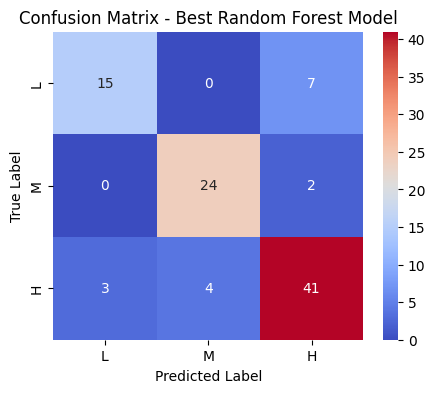

In [34]:
# 최적 모델 가져오기
best_rf = grid_search_rf.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_best_rf = best_rf.predict(X_test)

# 성능 평가
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"튜닝된 Random Forest 최적 정확도: {accuracy_best_rf:.4f}")

# 분류 보고서 출력
print("\nRandom Forest Best Model Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Random Forest Model")
plt.show()

- 튜닝 후에도 기본 랜덤 포레스트와 거의 동일한 성능
- 랜덤 포레스트는 현재까지 가장 높은 정확도(83.33%)를 유지 중
- 튜닝 후에도 성능이 그대로 유지되었지만, 최적의 모델을 찾았다고 볼 수 있음
- L(낮은 성적) 예측은 XGBoost보다 랜덤 포레스트가 조금 더 우수
- M(중간 성적)과 H(높은 성적)은 XGBoost와 비슷한 성능

## 8. SVM
- 커널을 활용해 데이터를 변환하여 복잡한 결정 경계를 학습할 수 있는 모델
- RBF 커널 사용


SVM 정확도: 0.6354

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.73      0.85      0.79        26
           2       0.65      0.58      0.62        48

    accuracy                           0.64        96
   macro avg       0.62      0.64      0.63        96
weighted avg       0.63      0.64      0.63        96



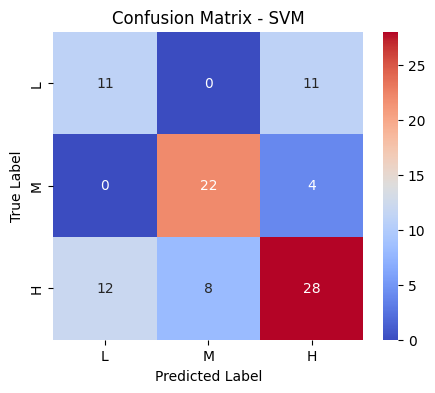

In [35]:
from sklearn.svm import SVC

# SVM 모델 초기화 (RBF 커널 사용)
svm_model = SVC(kernel="rbf", random_state=42)

# 모델 학습
svm_model.fit(X_train, y_train)

# 예측 수행
y_pred_svm = svm_model.predict(X_test)

# 모델 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM 정확도: {accuracy_svm:.4f}")

# 분류 보고서 출력
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

- SVM은 현재 최악의 성능을 보임
    - 랜덤 포레스트(83.33%)보다 19.79% 낮은 63.54% 정확도를 기록
    - 낮은 성적(L)과 높은 성적(H) 학생을 정확하게 예측하지 못함
    - M(중간 성적) 학생 예측은 괜찮지만, 전체 성능이 좋지 않음


In [36]:
# 하이퍼파라미터 후보 리스트 정의
param_grid_svm = {
    "C": [0.1, 1, 10, 100],  # 규제 파라미터 (높을수록 과적합, 낮을수록 일반화)
    "gamma": [0.01, 0.1, 1, 10],  # RBF 커널의 감마 값 (클수록 복잡한 결정 경계)
    "kernel": ["rbf"]  # RBF 커널 사용
}

# SVM 모델 초기화
svm_model = SVC(random_state=42)

# GridSearchCV 수행 (5-Fold 교차 검증)
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring="accuracy",  # 정확도 기준
    cv=5,  # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1  # 병렬 처리
)

# 학습 수행
grid_search_svm.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


튜닝된 SVM 최적 정확도: 0.5521

SVM Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        22
           1       0.61      0.42      0.50        26
           2       0.55      0.67      0.60        48

    accuracy                           0.55        96
   macro avg       0.55      0.51      0.53        96
weighted avg       0.56      0.55      0.55        96



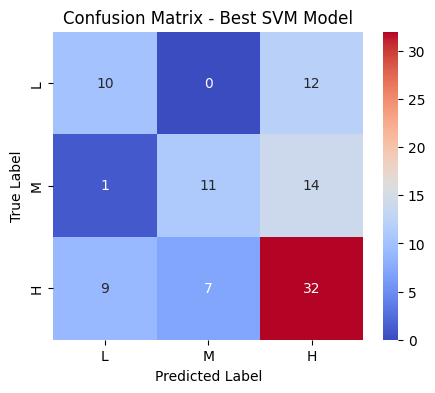

In [37]:
# 최적 모델 가져오기
best_svm = grid_search_svm.best_estimator_

# 테스트 데이터에 대한 예측
y_pred_best_svm = best_svm.predict(X_test)

# 성능 평가
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"튜닝된 SVM 최적 정확도: {accuracy_best_svm:.4f}")

# 분류 보고서 출력
print("\nSVM Best Model Classification Report:")
print(classification_report(y_test, y_pred_best_svm))

# 혼동 행렬 시각화
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best_svm), annot=True, fmt="d", cmap="coolwarm", xticklabels=["L", "M", "H"], yticklabels=["L", "M", "H"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

- 튜닝 후 오히려 더 낮아진 정확도...
- SVM 모델은 최적 모델이 아님
    - 튜닝 후에도 성능이 오히려 감소하여 55.21%로 하락
    - 기존 모델(XGBoost, 랜덤 포레스트) 대비 성능이 매우 낮음
    - 낮은 성적(L)과 중간 성적(M) 예측 성능이 특히 나쁨
    - SVM은 현재 데이터셋에 적합하지 않음

최종 결론: SVM 모델은 사용하지 않는 것이 좋음
- SVM은 중요한 특징을 선형적으로 분리하기 어렵거나, 차원이 높을 때 유리하지만,
현재 데이터에서는 성능이 매우 나쁨
- 따라서, XGBoost 또는 Random Forest가 최적의 선택지로 보임

## 8. ANN (Artificial Neural Network, 인공신경망)

In [38]:
# !pip install tensorflow

### 8-1) ANN 모델 구축

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [40]:
# 데이터 스케일링 (딥러닝 모델은 정규화가 필요함)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# ANN 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 입력층
    Dropout(0.3),  # 과적합 방지
    Dense(32, activation='relu'),  # 은닉층
    Dropout(0.3),
    Dense(16, activation='relu'),  # 추가 은닉층
    Dense(3, activation='softmax')  # 출력층 (3개의 클래스)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=16, verbose=1)

# 모델 평가
loss, accuracy_ann = model.evaluate(X_test_scaled, y_test)
print(f"ANN 정확도: {accuracy_ann:.4f}")

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.4654 - loss: 1.0000 - val_accuracy: 0.8125 - val_loss: 0.5608
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6615 - loss: 0.6748 - val_accuracy: 0.7917 - val_loss: 0.5728
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6484 - loss: 0.7120 - val_accuracy: 0.7604 - val_loss: 0.5481
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 0.6452 - val_accuracy: 0.7708 - val_loss: 0.5356
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7070 - loss: 0.6679 - val_accuracy: 0.8021 - val_loss: 0.5133
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6803 - loss: 0.6488 - val_accuracy: 0.7500 - val_loss: 0.5151
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6816 - loss: 0.6064 - val_accuracy: 0.7708 - val_loss: 0.5135
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7161 - loss: 0.6700 - val_accuracy: 0.7604 - val_los

- ANN이 SVM(55.21%)보다는 훨씬 높은 성능을 기록
- 하지만 XGBoost, Random Forest(83.33%)보다는 낮음
- Logistic Regression(82.29%)에도 미치지 못함

### 8-2) ANN 모델 성능 개선

- 현재 ANN 모델이 XGBoost, Random Forest보다 성능이 낮음

- 개선 전략
    - Batch Normalization 추가 → 학습 안정화
    - Dropout 비율 조정 (과적합 방지)
    - Learning Rate 감소 → 0.01 → 0.001
    - 더 깊은 신경망 설계 (레이어 추가)

In [43]:
from tensorflow.keras.layers import BatchNormalization

# 개선된 ANN 모델 구축
model_tuned = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # 추가: 학습 안정화
    Dropout(0.3),  # Dropout 조정
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3개의 클래스 (출력층)
])

# 모델 컴파일
model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history_tuned = model_tuned.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=16, verbose=1)

# 모델 평가
loss_tuned, accuracy_ann_tuned = model_tuned.evaluate(X_test_scaled, y_test)
print(f"튜닝된 ANN 정확도: {accuracy_ann_tuned:.4f}")

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4677 - loss: 1.1566 - val_accuracy: 0.6354 - val_loss: 0.9477
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6517 - loss: 0.7693 - val_accuracy: 0.6354 - val_loss: 0.8782
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6383 - loss: 0.7442 - val_accuracy: 0.6042 - val_loss: 0.8318
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6538 - loss: 0.7619 - val_accuracy: 0.6146 - val_loss: 0.8003
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6562 - loss: 0.6774 - val_accuracy: 0.6042 - val_loss: 0.7711
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7291 - loss: 0.6706 - val_accuracy: 0.6562 - val_loss: 0.7274
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7274 - loss: 0.6080 - val_accuracy: 0.6458 - val_loss: 0.7036
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6535 - loss: 0.7124 - val_accuracy: 0.6979 - va

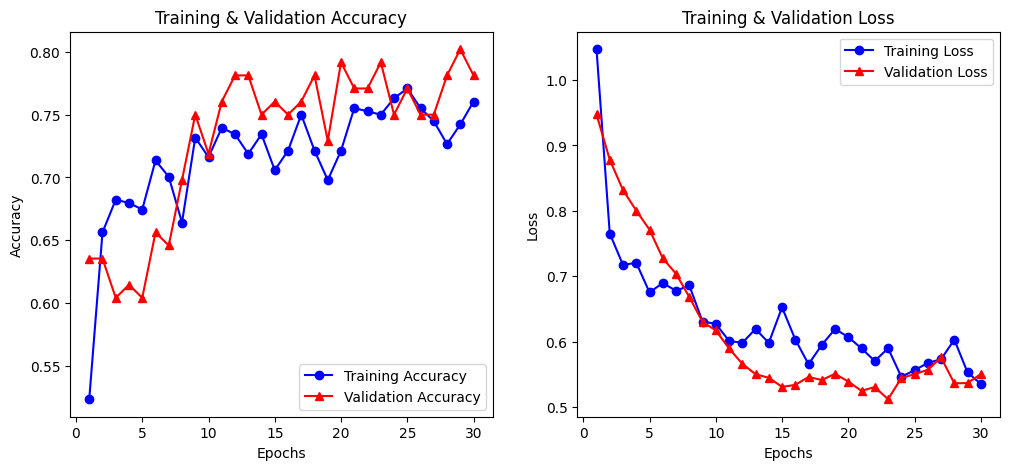

In [44]:
# 학습 과정에서 기록된 정확도 및 손실 데이터 가져오기
train_acc = history_tuned.history['accuracy']
val_acc = history_tuned.history['val_accuracy']
train_loss = history_tuned.history['loss']
val_loss = history_tuned.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# 정확도 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

### 8-3) 튜닝된 ANN 성능 분석


*정확도(Accuracy) 비교*

|모델	|정확도(Accuracy)|
|---|---|
|Logistic Regression|	82.29%|
|튜닝된 XGBoost|	82.29%|
|랜덤 포레스트|	83.33% ✅|
|SVM (튜닝 후)|	55.21% ❌|
|ANN (튜닝 후)|	78.12% ❗|

- 튜닝 후 ANN 성능이 기본 모델(76.04%)보다 향상됨
- 하지만 XGBoost, 랜덤 포레스트(83.33%)보다는 여전히 낮음

*에포크별 학습 과정 분석 (그래프 해석)*

- 훈련 정확도 & 검증 정확도

    - 학습이 진행될수록 훈련 정확도와 검증 정확도가 함께 증가하는 경향
    - 최종적으로 약 78% 검증 정확도를 기록
- 훈련 손실 & 검증 손실

    - 손실(Loss)이 지속적으로 감소하는 경향
    - Validation Loss가 큰 폭으로 증가하지 않음 → 과적합 없음
    - 하지만 20~30 에포크 구간에서 변동성이 있음

*결론*
- 랜덤 포레스트(83.33%) & XGBoost(82.29%)보다 낮은 정확도 (78.12%)
- 훈련 과정에서 심각한 과적합은 없지만, 변동성이 존재
- 추가적인 튜닝(더 깊은 네트워크, 데이터 증강 등)이 필요하지만, 일반 머신러닝 모델(XGBoost, 랜덤 포레스트)보다 성능이 낮아 비효율적

## 9. 최종 결론: 가장 좋은 모델은?

|모델	|최종 정확도	|비고|
|---|---|---|
|랜덤 포레스트	|83.33% ✅|	최고 성능 모델|
|튜닝된 XGBoost	|82.29%|	XGBoost도 성능이 우수|
|Logistic Regression|	82.29%	|단순하지만 강력|
|튜닝된 ANN	|78.12% ❗|	더 튜닝 필요, 하지만 비효율적|
|SVM	|55.21% ❌|	사용하지 않는 것이 좋음|

- 최적의 모델: 랜덤 포레스트 (83.33%)
- XGBoost(82.29%)도 좋은 대안
- ANN(78.12%)는 더 튜닝하면 개선 가능하지만, 현재로선 랜덤 포레스트보다 효율적이지 않음
- SVM은 성능이 너무 낮아 제외

## + 랜덤 포레스트 & XGBoost 특성 중요도 분석
- 두 모델은 각 특성이 예측에 미치는 영향(변수의 중요도)을 점수로 제공함
- 이를 시각화해서 어떤 변수가 가장 중요한지 확인해보자



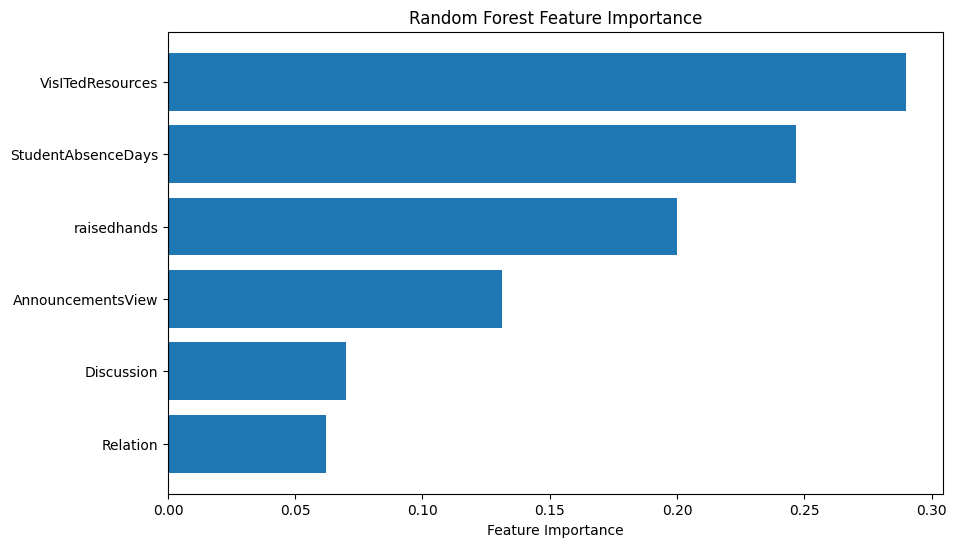

In [45]:
# 랜덤 포레스트에서 특성 중요도 가져오기
feature_importance_rf = best_rf.feature_importances_
feature_names = X_train.columns

# 중요도 순으로 정렬
sorted_idx = np.argsort(feature_importance_rf)[::-1]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance_rf[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # 큰 값이 위에 오도록 반전
plt.show()

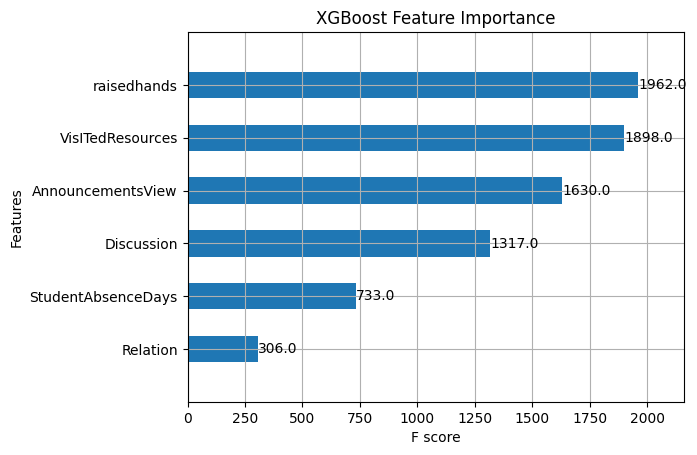

In [54]:
# XGBoost Feature Importance 시각화
from xgboost import plot_importance # import the plot_importance function

plot_importance(best_xgb, importance_type='weight', max_num_features=10, height=0.5) # Call the function directly
plt.title("XGBoost Feature Importance")
plt.show()

### Feature Importance 분석 (랜덤 포레스트 vs XGBoost)

*랜덤 포레스트(Random Forest) 중요 변수*

- 랜덤 포레스트는 "과목 공지 확인 횟수(VisITedResources)"가 가장 중요한 변수라고 판단
- 결석(StudentAbsenceDays)과 학습 참여(raisedhands)가 중요 변수로 확인됨

*XGBoost 중요 변수*

- XGBoost는 "손 든 횟수(raisedhands)"를 가장 중요한 변수로 선택
- 랜덤 포레스트와 비교했을 때, "과목 공지 확인(VisITedResources)"과 "손 든 횟수(raisedhands)"가 가장 중요한 역할을 함
- XGBoost는 "토론 참여(Discussion)"를 랜덤 포레스트보다 더 중요한 요소로 평가

*공통적으로 중요한 변수*
- raisedhands (손 든 횟수), VisITedResources (과목 공지 확인 횟수), AnnouncementsView (공지 조회), Discussion (토론 참여), StudentAbsenceDays (결석 횟수)
    
    → 학습 참여도가 높을수록 성적이 좋을 가능성이 큼
    
    → 결석 횟수가 많을수록 성적이 낮아질 가능성이 큼

### 결론
- 랜덤 포레스트(83.33%)가 가장 좋은 성능을 기록했으며, 학습 참여도가 성적 예측에 중요한 역할을 함
- XGBoost도 유사한 성능을 보이며, "손 든 횟수(raisedhands)"를 가장 중요한 요소로 봄
- 학습 참여(raisedhands, VisITedResources, Discussion)와 결석(StudentAbsenceDays)이 성적 예측의 핵심 변수임을 확인

*데이터 기반 인사이트 제공 방안*

- 학생들의 학습 행동을 분석하여 성적 향상 전략을 제안해 볼 수 있음
- raisedhands(손 든 횟수)와 VisITedResources(과목 공지 확인 횟수)를 늘리면 성적이 향상될 가능성이 높음